In [1]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from persistable_model import PresistableModel


In [2]:
# useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn
# https://www.kaggle.com/datasets/pablotab/mnistpklgz
from utilities import vectorize_label


with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
Y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]



In [3]:
# model = NeuralNetwork([784, 100, 10])
# model.fit(X_train, y_train, 30, 3.0, 20)

# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
model = PresistableModel.load('baseline')
type(model)

model.NeuralNetwork

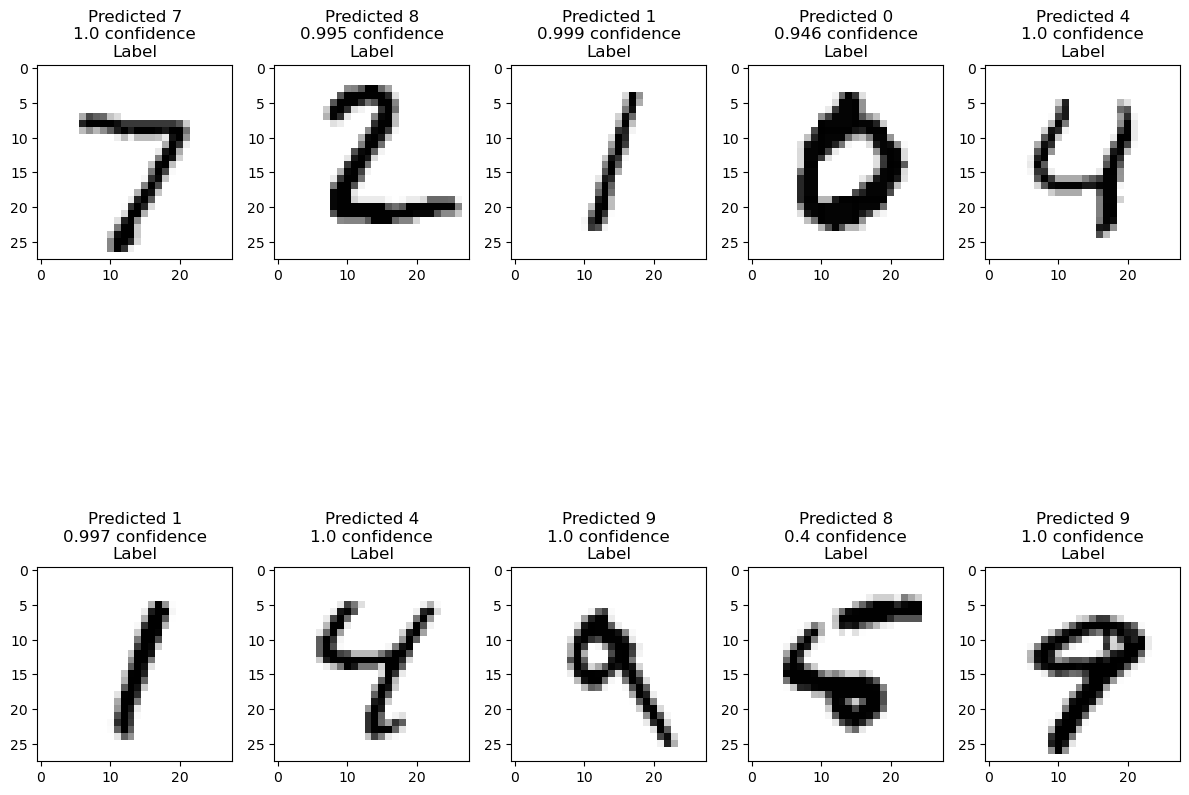

In [7]:
n_prediction = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 12))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, confidence, y = model.predict(X_test[i])
    ax.set_title('Predicted {}\n{} confidence\nLabel {}'.format(prediction, confidence, y_test[i]))

plt.tight_layout()
plt.show()
